In [1]:
import findspark.
findspark.init()

In [2]:
import pyspark

In [3]:
import mysql.connector
import pandas as pd
from pyspark.sql import SparkSession

In [4]:
appName = "PySpark MySQL Example - via mysql.connector"
master = "local"

In [5]:
spark = SparkSession.builder.master(master).appName(appName).getOrCreate()

In [6]:
import mysql.connector

In [7]:
conn =mysql.connector.connect(user='root', database='cat2',password='0605',host="localhost")

In [8]:
cursor= conn.cursor()
query="SELECT * FROM crop_recommendation"
pdf = pd.read_sql(query.encode('utf-8'), con=conn)
conn.close()

In [9]:
pdf

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [74]:
print(pdf['label'].unique())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


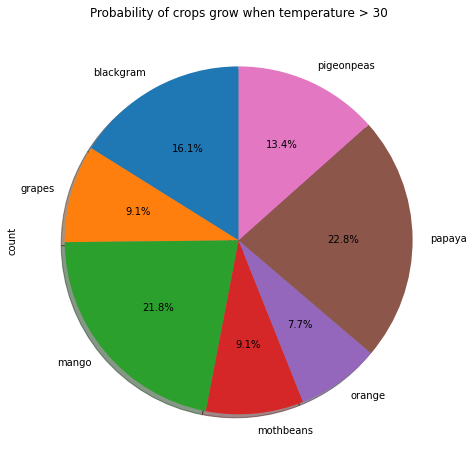

In [61]:
x = pd.DataFrame(pd.crosstab(pdf.label[pdf.temperature > 30],'count',normalize=True)*100)
x.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('crops grow when temperature > 30')
plt.show()

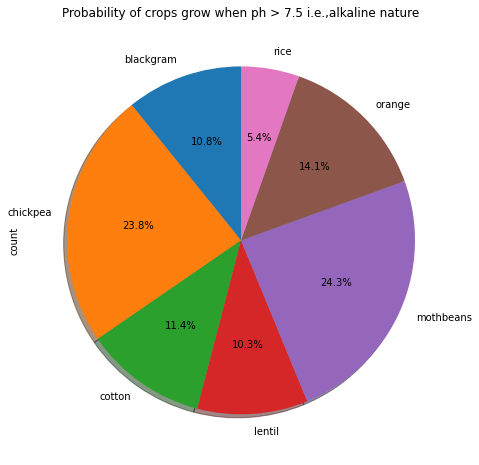

In [71]:
#which crops can grow at higher ph value .i.e., (alkaline nature) ph > 7.5
x = pd.DataFrame(pd.crosstab(pdf.label[pdf.ph > 7.5],'count',normalize=True)*100)
x.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when ph > 7.5 i.e.,alkaline nature')
plt.show()

rainfall : N


C:\Users\jothi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


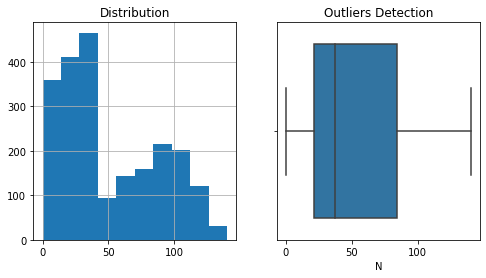



rainfall : P


C:\Users\jothi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


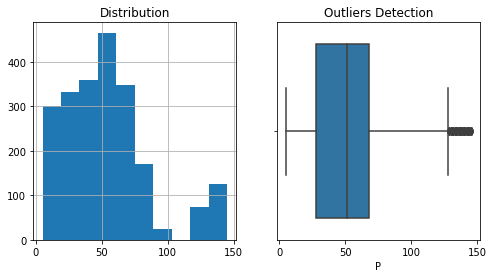



rainfall : K


C:\Users\jothi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


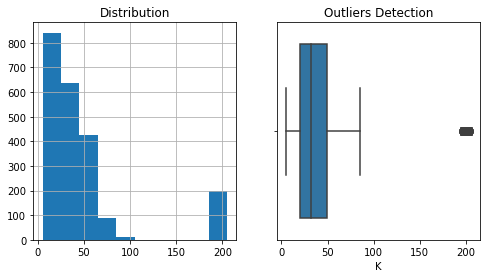



rainfall : TEMPERATURE


C:\Users\jothi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


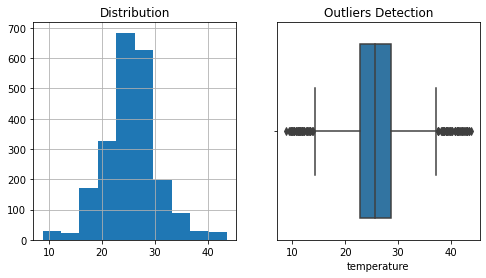



rainfall : HUMIDITY


C:\Users\jothi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


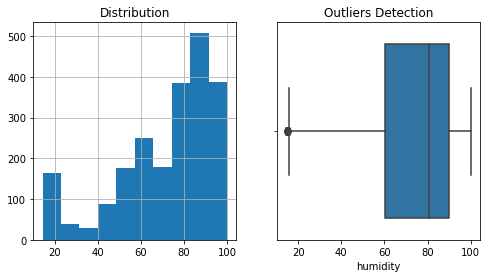



rainfall : PH


C:\Users\jothi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


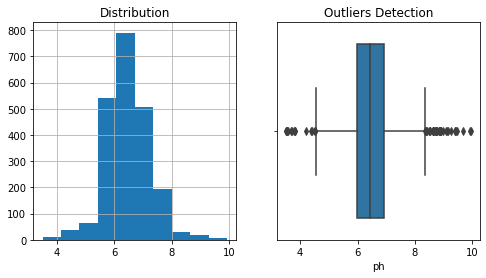

In [68]:
#checking for outliers in the data
import seaborn as sns
for i in pdf.columns[:-2]:
    print('rainfall :',i.upper())
    fig, axes = plt.subplots(1,2,figsize=(8,4))
    axes[0].set_title('Distribution')
    axes[1].set_title('Outliers Detection')
    pdf[i].hist(ax=axes[0])
    sns.boxplot(pdf[i],ax=axes[1])
    plt.show()
    print('\n')

<AxesSubplot:>

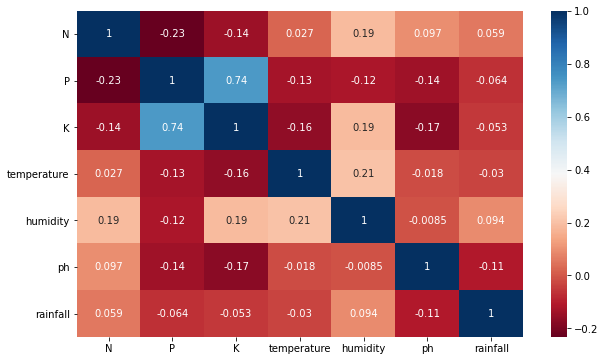

In [70]:
#checking the corelation
plt.figure(figsize=(10,6))
sns.heatmap(pdf.corr(),annot=True,cmap='RdBu')

In [31]:
df=spark.createDataFrame(pdf)

In [32]:
df.show()

+---+---+---+-----------+-----------------+------------------+------------------+-----+
|  N|  P|  K|temperature|         humidity|                ph|          rainfall|label|
+---+---+---+-----------+-----------------+------------------+------------------+-----+
| 90| 42| 43|20.87974371|      82.00274423| 6.502985292000001|       202.9355362| rice|
| 85| 58| 41|21.77046169|      80.31964408|       7.038096361|       226.6555374| rice|
| 60| 55| 44|23.00445915|       82.3207629|       7.840207144|       263.9642476| rice|
| 74| 35| 40|26.49109635|      80.15836264|       6.980400905|       242.8640342| rice|
| 78| 42| 42|20.13017482|      81.60487287|       7.628472891|       262.7173405| rice|
| 69| 37| 42|23.05804872|      83.37011772|       7.073453503|       251.0549998| rice|
| 69| 55| 38|22.70883798|      82.63941394|        5.70080568|       271.3248604| rice|
| 94| 53| 40|20.27774362|      82.89408619| 5.718627177999999|       241.9741949| rice|
| 89| 54| 38|24.51588066|83.5352

In [36]:
df.printSchema()


root
 |-- N: long (nullable = true)
 |-- P: long (nullable = true)
 |-- K: long (nullable = true)
 |-- temperature: double (nullable = true)
 |-- humidity: double (nullable = true)
 |-- ph: double (nullable = true)
 |-- rainfall: double (nullable = true)
 |-- result: string (nullable = true)



In [34]:
df = df.withColumnRenamed('label', 'result')
cols = df.columns

In [35]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'double']
df.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
temperature,2200,25.616243851779533,5.0637485999588545,8.825674745,43.67549305
humidity,2200,71.48177921778648,22.263811589761104,14.25803981,99.98187601
ph,2200,6.469480065256369,0.7739376880298732,3.504752314,9.93509073
rainfall,2200,103.46365541576832,54.958388524878174,20.21126747,298.5601175


In [26]:
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).show()

+---+---+---+-----------+--------+---+--------+------+
|  N|  P|  K|temperature|humidity| ph|rainfall|result|
+---+---+---+-----------+--------+---+--------+------+
|  0|  0|  0|          0|       0|  0|       0|     0|
+---+---+---+-----------+--------+---+--------+------+



In [37]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
stages = []
label_stringIdx = StringIndexer(inputCol = 'result', outputCol = 'label')
stages += [label_stringIdx]
numericCols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph','rainfall']
assemblerInputs = numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]


In [38]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['label', 'features'] + cols
df = df.select(selectedCols)
df.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- N: long (nullable = true)
 |-- P: long (nullable = true)
 |-- K: long (nullable = true)
 |-- temperature: double (nullable = true)
 |-- humidity: double (nullable = true)
 |-- ph: double (nullable = true)
 |-- rainfall: double (nullable = true)
 |-- result: string (nullable = true)



In [39]:
df.select("features").show(truncate=False)

+-----------------------------------------------------------------------------+
|features                                                                     |
+-----------------------------------------------------------------------------+
|[90.0,42.0,43.0,20.87974371,82.00274423,6.502985292000001,202.9355362]       |
|[85.0,58.0,41.0,21.77046169,80.31964408,7.038096361,226.6555374]             |
|[60.0,55.0,44.0,23.00445915,82.3207629,7.840207144,263.9642476]              |
|[74.0,35.0,40.0,26.49109635,80.15836264,6.980400905,242.8640342]             |
|[78.0,42.0,42.0,20.13017482,81.60487287,7.628472891,262.7173405]             |
|[69.0,37.0,42.0,23.05804872,83.37011772,7.073453503,251.0549998]             |
|[69.0,55.0,38.0,22.70883798,82.63941394,5.70080568,271.3248604]              |
|[94.0,53.0,40.0,20.27774362,82.89408619,5.718627177999999,241.9741949]       |
|[89.0,54.0,38.0,24.51588066,83.53521629999999,6.685346424,230.4462359]       |
|[68.0,58.0,38.0,23.22397386,83.03322691

In [40]:
from pyspark.ml.feature import StandardScaler
standardscaler=StandardScaler().setInputCol("features").setOutputCol("Scaled_features")
df=standardscaler.fit(df).transform(df)
df.select("features","Scaled_features").show(5)

+--------------------+--------------------+
|            features|     Scaled_features|
+--------------------+--------------------+
|[90.0,42.0,43.0,2...|[2.43787919261129...|
|[85.0,58.0,41.0,2...|[2.30244145968844...|
|[60.0,55.0,44.0,2...|[1.62525279507419...|
|[74.0,35.0,40.0,2...|[2.00447844725817...|
|[78.0,42.0,42.0,2...|[2.11282863359645...|
+--------------------+--------------------+
only showing top 5 rows



In [41]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
label,20,20,20,20,20
features,"[90.0, 42.0, 43.0, 20.87974371, 82.00274423, 6...","[85.0, 58.0, 41.0, 21.77046169, 80.31964408, 7...","[60.0, 55.0, 44.0, 23.00445915, 82.3207629, 7....","[74.0, 35.0, 40.0, 26.49109635, 80.15836264, 6...","[78.0, 42.0, 42.0, 20.13017482, 81.60487287, 7..."
N,90,85,60,74,78
P,42,58,55,35,42
K,43,41,44,40,42
temperature,20.8797,21.7705,23.0045,26.4911,20.1302
humidity,82.0027,80.3196,82.3208,80.1584,81.6049
ph,6.50299,7.0381,7.84021,6.9804,7.62847
rainfall,202.936,226.656,263.964,242.864,262.717
result,rice,rice,rice,rice,rice


In [42]:
train, test = df.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 1567
Test Dataset Count: 633


In [43]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol="label", featuresCol="Scaled_features",maxIter=10)
model=lr.fit(train)
predict_train=model.transform(train)
predict_test=model.transform(test)
predict_test.select("label","prediction").show(100)

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|     

In [53]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator()
print('Accuracy', evaluator.evaluate(predict_test))

Accuracy 0.9064657707304777


In [46]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

In [47]:
dt = DecisionTreeClassifier(labelCol="label", featuresCol="Scaled_features", maxDepth=2)

# Create ParamGrid for Cross Validation
dtparamGrid = (ParamGridBuilder()
             .addGrid(dt.maxDepth, [2, 5, 10, 20, 30])
             .addGrid(dt.maxBins, [10, 20, 40, 80, 100])
             .build())

In [48]:
dtevaluator = MulticlassClassificationEvaluator(predictionCol="prediction")

In [49]:
dtcv = CrossValidator(estimator = dt,
                      estimatorParamMaps = dtparamGrid,
                      evaluator = dtevaluator,
                      numFolds = 5)

In [50]:
dtcvModel = dtcv.fit(train)
print(dtcvModel) 

CrossValidatorModel_dd5ac98070b7


In [51]:
dtpredictions = dtcvModel.transform(test)

In [52]:
print('Accuracy:', dtevaluator.evaluate(dtpredictions))
#print('AUC:', MulticlassMetrics(dtpredictions['label','prediction'].rdd).areaUnderROC)

Accuracy: 0.9857252970038499
